# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

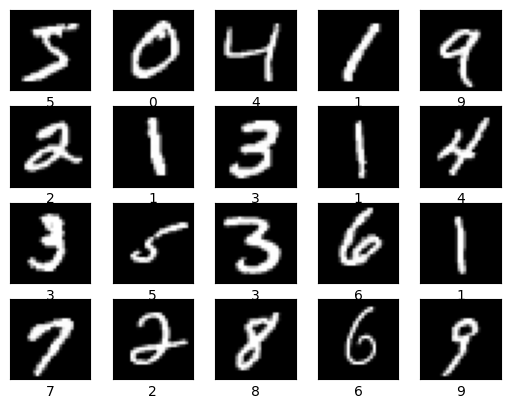

In [ ]:
# Run this to load the MNIST dataset
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
)
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree,
)

train_img, train_labels = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(train_img[i].reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=train_labels[i])




### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

In [ ]:


SEED = 42

train_img, test_img, train_labels, test_labels = train_test_split(
    train_img, train_labels,
    test_size=1/7.0,
    random_state=SEED,
)

In [25]:

scaler = StandardScaler()
train_img_scaled = scaler.fit_transform(train_img)
test_img_scaled = scaler.transform(test_img)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],  
    'penalty': ['l2'],  
    'max_iter': [10,100, 1000]
}

# Perform grid search with cross-validation
print("Performing grid search...")
grid_search = GridSearchCV(
    LogisticRegression(random_state=SEED,solver="lbfgs", multi_class="auto"),
    param_grid,
    cv=5,
)

grid_search.fit(train_img_scaled, train_labels)

# Get best model
best_model = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)

# Evaluate model
y_pred = best_model.predict(test_img_scaled)
accuracy = accuracy_score(test_labels, y_pred)
print("\nTest accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

print("score : " + str(best_model.score(test_img_scaled, test_labels)))


# Visualize classification vectors
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    weights = best_model.coef_[i].reshape(28, 28)
    plt.imshow(weights, cmap='seismic', interpolation='nearest')
    plt.title(f'Digit {i}')
    plt.colorbar()
plt.tight_layout()
plt.show()


# https://scikit-learn.org/stable/modules/preprocessing.html

# user a scaler : 
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_to_Speed-up_Machine_Learning_Algorithms.ipynb 

# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

Performing grid search...


C:\Users\Oscar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Oscar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

KeyboardInterrupt: 

### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

In [32]:
# https://builtin.com/machine-learning/pca-in-python
from sklearn.decomposition import PCA

# take the minimum of components such as 95% of the variance is retained
pca = PCA(0.95)

pca.fit(train_img_scaled)
print("Number of components:", pca.n_components_)

train_img_pca = pca.transform(train_img_scaled)
test_img_pca = pca.transform(test_img_scaled)



Number of components: 330


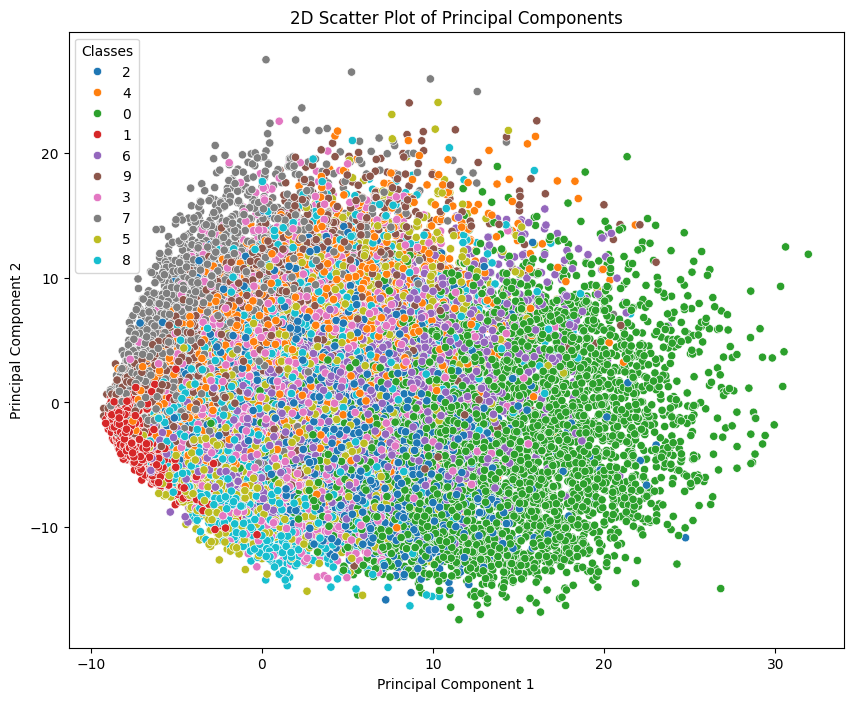

In [38]:



# nb_comp = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.8)[0][0]
# print("Number of components for 80% variance:", nb_comp)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.axvline(x=nb_comp, color='r', linestyle='--')
# plt.axhline(y=0.8, color='g', linestyle='--')
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.savefig('pca_variance_explained.png')
# plt.show()

# Plot the first 20 principal components' loadings
# fig, ax = plt.subplots(4, 5, figsize=(15, 8))
# for i, axi in enumerate(ax.flat):
#     component = pca.components_[i].reshape(28, 28)
#     vmax = np.abs(component).max()
#     axi.imshow(component, cmap='RdBu_r', vmin=-vmax, vmax=vmax)
#     axi.set_title(f'PC {i+1}')
#     axi.axis('off')
# plt.suptitle('First 20 Principal Components Loadings', y=1.02, size=14)
# plt.tight_layout()
# plt.savefig('pca_loadings.png')
# plt.show()
# answer : The plot shows the loadings of the first 20 principal components. Each principal component is represented as a 28x28 image, where each pixel corresponds to a feature in the original dataset. The color of each pixel indicates the weight of the corresponding feature in the principal component. Blue pixels represent negative weights, red pixels represent positive weights, and white pixels represent zero weights. The intensity of the color indicates the magnitude of the weight. By examining the loadings of the principal components, we can gain insights into the underlying structure of the data and identify patterns that are important for explaining the variance in the dataset.


# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=train_img_pca[:, 0], y=train_img_pca[:, 1], hue=train_labels, palette='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of Principal Components')
plt.legend(title='Classes')
plt.savefig('pca_scatter_classes_visu.png')
plt.show()



### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
        
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.


Detailed Analysis of PCA Components:
--------------------------------------------------

At 70% explained variance:
- Number of components needed: 170
- Dimension reduction: 784 → 170
- Compression ratio: 78.3%

At 80% explained variance:
- Number of components needed: 271
- Dimension reduction: 784 → 271
- Compression ratio: 65.4%

At 85% explained variance:
- Number of components needed: 354
- Dimension reduction: 784 → 354
- Compression ratio: 54.8%

At 90% explained variance:
- Number of components needed: 467
- Dimension reduction: 784 → 467
- Compression ratio: 40.4%

At 95% explained variance:
- Number of components needed: 609
- Dimension reduction: 784 → 609
- Compression ratio: 22.3%

At 99% explained variance:
- Number of components needed: 746
- Dimension reduction: 784 → 746
- Compression ratio: 4.8%


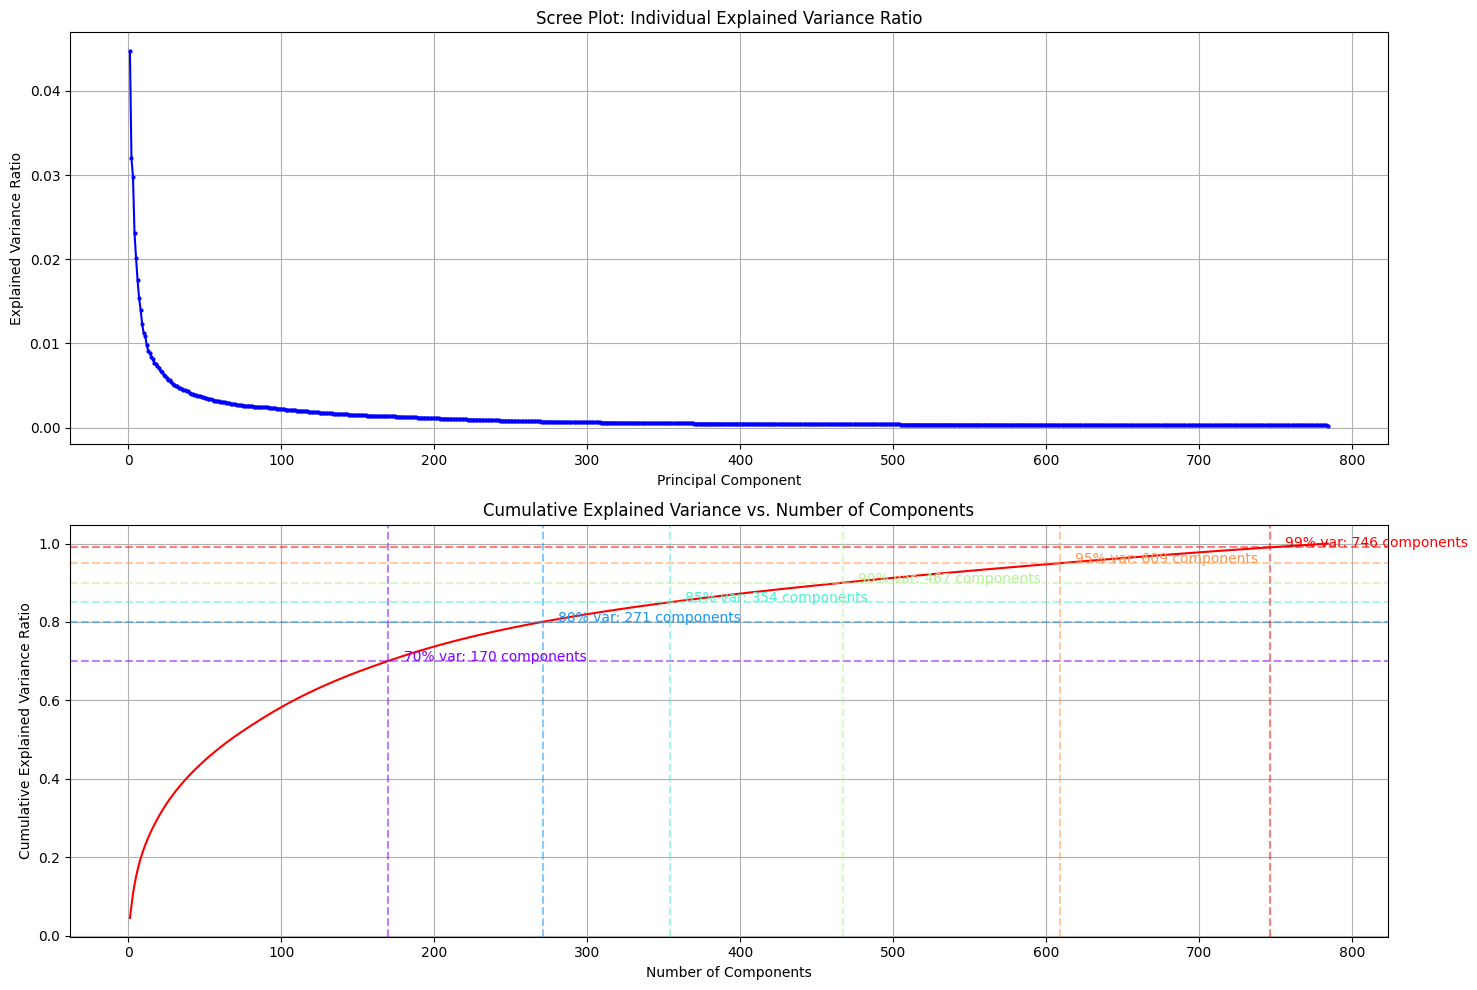

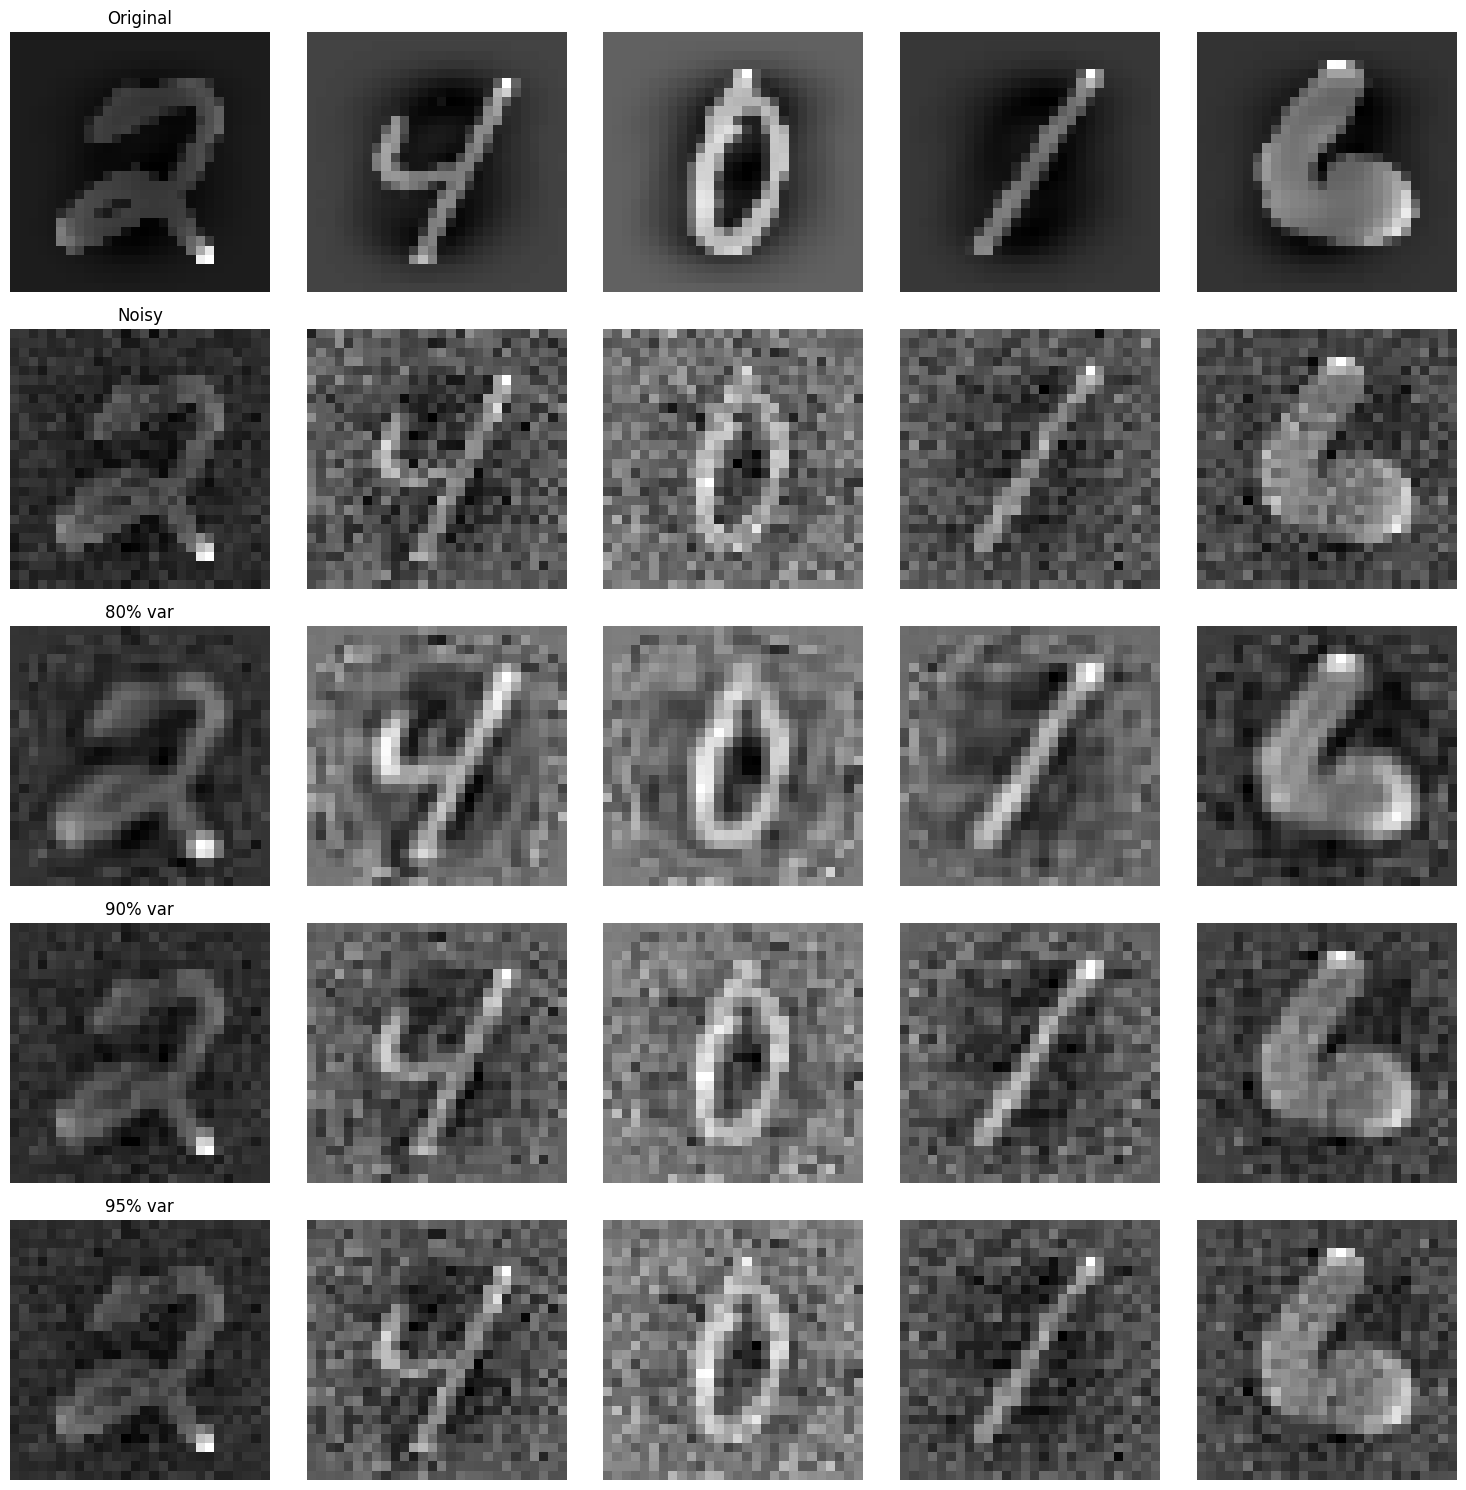

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def analyze_variance_thresholds(noisy_train_img, thresholds=[0.7, 0.8, 0.85, 0.9, 0.95, 0.99]):
    n_features = noisy_train_img.shape[1]
    scaler = StandardScaler()
    noisy_train_img = scaler.fit_transform(noisy_train_img)
    pca = PCA()
    pca.fit(noisy_train_img)
    
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    fig = plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 1, 1)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_, 'bo-', markersize=2)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot: Individual Explained Variance Ratio')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(range(1, len(cumsum) + 1), cumsum, 'r-')
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(thresholds)))
    for thr, color in zip(thresholds, colors):
        n_components = np.argmax(cumsum >= thr) + 1
        plt.axhline(y=thr, color=color, linestyle='--', alpha=0.5)
        plt.axvline(x=n_components, color=color, linestyle='--', alpha=0.5)
        plt.text(n_components + 10, thr, 
                f'{thr:.0%} var: {n_components} components',
                color=color)
    
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('pca_variance_thresholds.png')
    
    print("\nDetailed Analysis of PCA Components:")
    print("-" * 50)
    for thr in thresholds:
        n_components = np.argmax(cumsum >= thr) + 1
        compression_ratio = (n_features - n_components) / n_features * 100
        print(f"\nAt {thr:.0%} explained variance:")
        print(f"- Number of components needed: {n_components}")
        print(f"- Dimension reduction: {n_features} → {n_components}")
        print(f"- Compression ratio: {compression_ratio:.1f}%")
    
    return pca

def visualize_reconstruction_quality(train_img, noisy_train_img, variance_thresholds=[0.8, 0.9, 0.95]):
    fig, axes = plt.subplots(len(variance_thresholds) + 2, 5, 
                            figsize=(15, 3*(len(variance_thresholds) + 2)))
    
    for i in range(5):
        axes[0, i].imshow(train_img[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title('Original' if i == 0 else '')
        
        axes[1, i].imshow(noisy_train_img[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title('Noisy' if i == 0 else '')
    
    for idx, threshold in enumerate(variance_thresholds):
        pca = PCA(n_components=np.argmax(PCA().fit(noisy_train_img).explained_variance_ratio_.cumsum() >= threshold) + 1)
        reconstructed = pca.inverse_transform(pca.fit_transform(noisy_train_img))
        
        for i in range(5):
            axes[idx + 2, i].imshow(reconstructed[i].reshape(28, 28), cmap='gray')
            axes[idx + 2, i].axis('off')
            axes[idx + 2, i].set_title(f'{threshold:.0%} var' if i == 0 else '')
    
    plt.tight_layout()
    plt.savefig('pca_reconstruction_quality.png')
    plt.show()

def determine_optimal_variance(train_img, noisy_train_img):
    pca = analyze_variance_thresholds(noisy_train_img)

    visualize_reconstruction_quality(train_img, noisy_train_img)
    
    return pca



def add_noise(X, noise_level=0.5):
    return X + noise_level * np.random.randn(*X.shape)

pca = determine_optimal_variance(train_img, add_noise(train_img))
